##### Import Essential Libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

##### Defining f(u) and building neural network

In [2]:
# Parameters
steps = 500  # Number of steps to simulate

# Updated nonlinear function of the plant
def f(u):
    return u**3 + 0.3 * u**2 - 0.4 * u

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 20)   # Input layer with 20 hidden units
        self.fc2 = nn.Linear(20, 10)  # Hidden layer with 10 units
        self.fc3 = nn.Linear(10, 1)   # Output layer with 1 unit
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network and define loss and optimizer
net = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.25)

##### Plant and Model Output Simulation with Neural Network Training

In [3]:
# Simulate the plant output and perform training with the specified input pattern
y_plant = np.zeros(steps)
y_model = np.zeros(steps)
u = np.zeros(steps)

# Define input as a sinusoid and change to the sum of two sinusoids at k=250
for k in range(steps):
    if k < 250:
        u[k] = np.sin(2 * np.pi * k / 250)
    else:
        u[k] = np.sin(2 * np.pi * k / 250) + np.sin(2 * np.pi * k / 25)

# Initial conditions for the plant and model
y_plant[0] = 0
y_plant[1] = 0
y_model[0] = 0
y_model[1] = 0

# training process
for k in range(2, steps):
    # Compute the plant output
    y_plant[k] = 0.3 * y_plant[k - 1] + 0.6 * y_plant[k - 2] + f(u[k])
    
    # Neural network prediction for the model
    input_tensor = torch.tensor([[u[k]]], dtype=torch.float32)
    nn_output = net(input_tensor)  # Neural network approximation of f(u)
    y_model[k] = 0.3 * y_model[k - 1] + 0.6 * y_model[k - 2] + nn_output.item()
    
    # Compute the loss and perform a single backpropagation step
    target = torch.tensor([[f(u[k])]], dtype=torch.float32)
    loss = criterion(nn_output, target)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


##### Plotting

<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:7: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:7: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Roja\AppData\Local\Temp\ipykernel_22580\1424945296.py:4: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(y_model, label='$\hat{y}_p$', linestyle='--')  # Model output (neural network)
C:\Users\Roja\AppData\Local\Temp\ipykernel_22580\1424945296.py:7: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Outputs $y_p$ and $\hat{y}_p$")


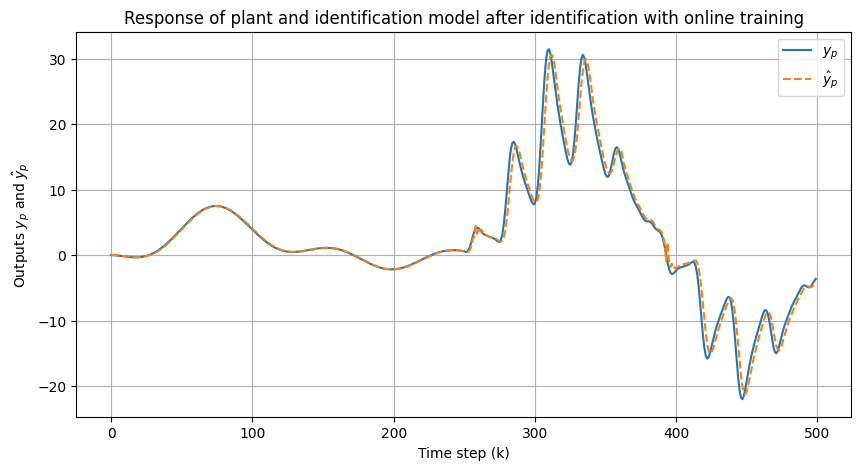

In [4]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(y_plant, label='$y_p$', linestyle='-')  # Plant output
plt.plot(y_model, label='$\hat{y}_p$', linestyle='--')  # Model output (neural network)

plt.xlabel("Time step (k)")
plt.ylabel("Outputs $y_p$ and $\hat{y}_p$")
plt.title("Response of plant and identification model after identification with online training")
plt.legend()
plt.grid()
plt.show()